In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes (1).csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
classifier=DecisionTreeClassifier()

In [34]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.618395618556701, 0.9615384615384616, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.3269974226804124, 0.8846153846153846, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.18814432989690721, 0.8076923076923077, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.12371134020618557, 0.7307692307692307, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.1134020618556701, 0.6538461538461539, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.10309278350515463, 0.5769230769230769, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.041237113402061855, 0.5, 'x[4] <= 156.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.020618556701030927, 0.4230769230769231, 'x[3] <= 41.0\ngini = 0.019\nsamples = 104\nvalue = [103, 1]'),
 Text(0.010309278350515464, 0.34615384615384615, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.0309278350515463

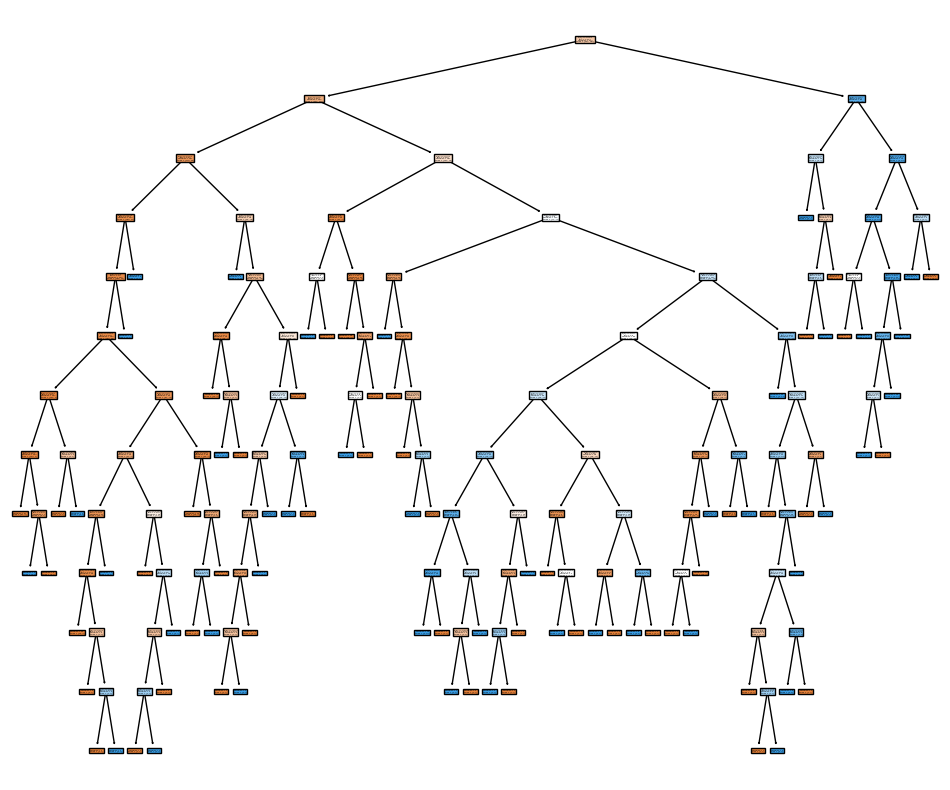

In [35]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [37]:
y_pred=classifier.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7007874015748031
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       156
           1       0.63      0.55      0.59        98

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.68       254
weighted avg       0.70      0.70      0.70       254



In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [43]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [44]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [45]:
y_pred=clf.predict(X_test)

In [48]:
classifier=DecisionTreeClassifier(criterion= 'log_loss',
 max_depth= 5,
 max_features='sqrt',
 splitter= 'best')

In [49]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='sqrt')

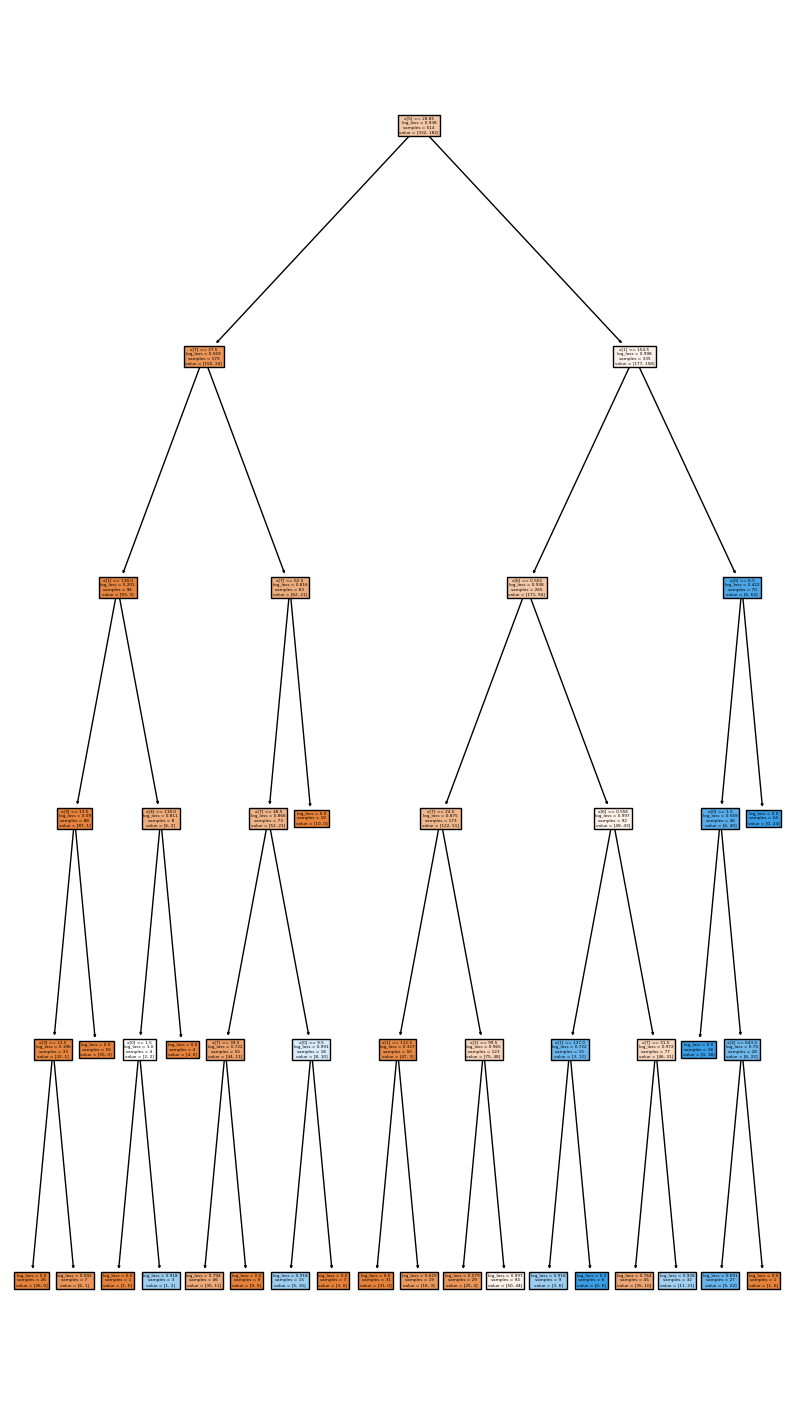

In [59]:
from sklearn import tree
plt.figure(figsize=(10,18))
tree.plot_tree(classifier,filled=True)
plt.show()


In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix=confusion_matrix(y_pred,y_test)
score=accuracy_score(y_pred,y_test)
print(confusion_matrix)
print(score)
print(classification_report(y_pred,y_test))

[[124  52]
 [ 44  34]]
0.6220472440944882
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       176
           1       0.40      0.44      0.41        78

    accuracy                           0.62       254
   macro avg       0.57      0.57      0.57       254
weighted avg       0.63      0.62      0.63       254

